# <div style="color:magenta;display:inline-block;border-radius:5px;background-color:#E6FFE6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:magenta;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b> Import Modules</p></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install rdkit-pypi
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

import math

rc = {
    "axes.facecolor": "#E6FFE6",
    "figure.facecolor": "#E6FFE6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)
!pip install colorama
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 61.1 MB/s eta 0:00:00


# <div style="color:magenta;display:inline-block;border-radius:5px;background-color:#E6FFE6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:magenta;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>Load data💾</p></div>

In [2]:
df = pd.read_csv('/adata_obs_meta.csv')
df.head()

,obs_id,library_id,plate_name,well,row,col,cell_id,donor_id,cell_type,sm_lincs_id,sm_name,SMILES,dose_uM,timepoint_hr,control
0,000006a87ba75b72,library_4,plate_4,F7,F,7,PBMC,donor_2,T cells CD4+,LSM-4944,MLN 2238,CC(C)C[C@H](NC(=O)CNC(=O)c1cc(Cl)ccc1Cl)B(O)O,1.0,24,False
1,0000233976e3cd37,library_0,plate_3,D4,D,4,PBMC,donor_1,T cells CD4+,LSM-46203,BMS-265246,CCCCOc1c(C(=O)c2c(F)cc(C)cc2F)cnc2[nH]ncc12,1.0,24,False
2,0001533c5e876362,library_2,plate_0,B11,B,11,PBMC,donor_0,T regulatory cells,LSM-45663,Resminostat,CN(C)Cc1ccc(S(=O)(=O)n2ccc(/C=C/C(=O)NO)c2)cc1,1.0,24,False
3,00022f989630d14b,library_35,plate_2,E6,E,6,PBMC,donor_0,T cells CD4+,LSM-43216,FK 866,O=C(/C=C/c1cccnc1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,1.0,24,False
4,0002560bd38ce03e,library_22,plate_4,B6,B,6,PBMC,donor_2,T cells CD4+,LSM-1099,Nilotinib,Cc1cn(-c2cc(NC(=O)c3ccc(C)c(Nc4nccc(-c5cccnc5)...,1.0,24,False


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
obs_id          0
library_id      0
plate_name      0
well            0
row             0
col             0
cell_id         0
donor_id        0
cell_type       0
sm_lincs_id     0
sm_name         0
SMILES          0
dose_uM         0
timepoint_hr    0
control         0
dtype: int64


# <div style="color:magenta;display:inline-block;border-radius:5px;background-color:#E6FFE6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:magenta;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b> Exploratory Data Analysis (EDA)📊</p></div>

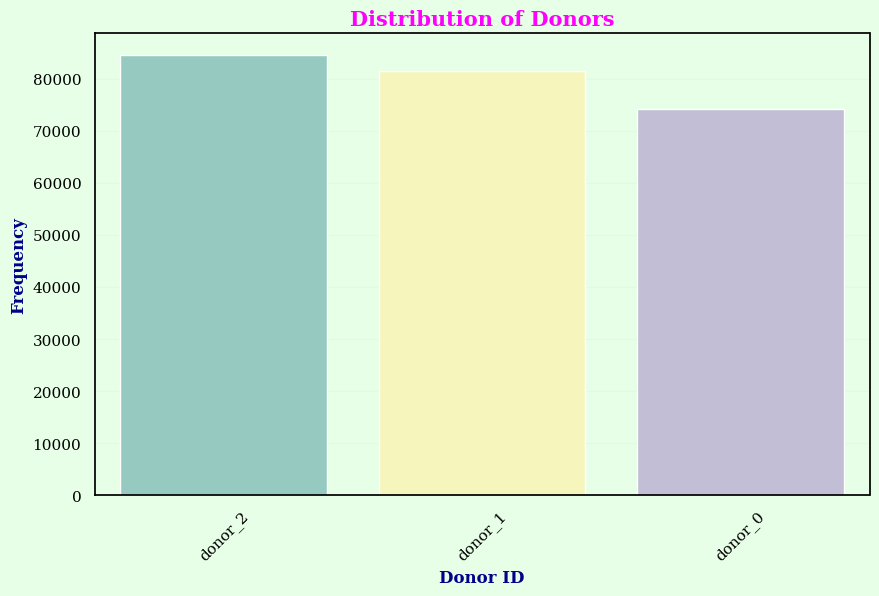

In [4]:
# Count plot for 'donor_id'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='donor_id', palette='Set3')
plt.title("Distribution of Donors",fontsize = 15, fontweight = 'bold', color = 'magenta')
plt.xlabel("Donor ID",fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Frequency",fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.xticks(rotation=45)
plt.savefig('Distribution of Donors.png')
plt.show()

🟧 This plot displays the frequency of each donor in the dataset. Each bar represents a different donor, and the height of the bar indicates how many samples belong to each donor.

🟧 This visualization will give you an overview of how the samples are distributed across different donors in your dataset.

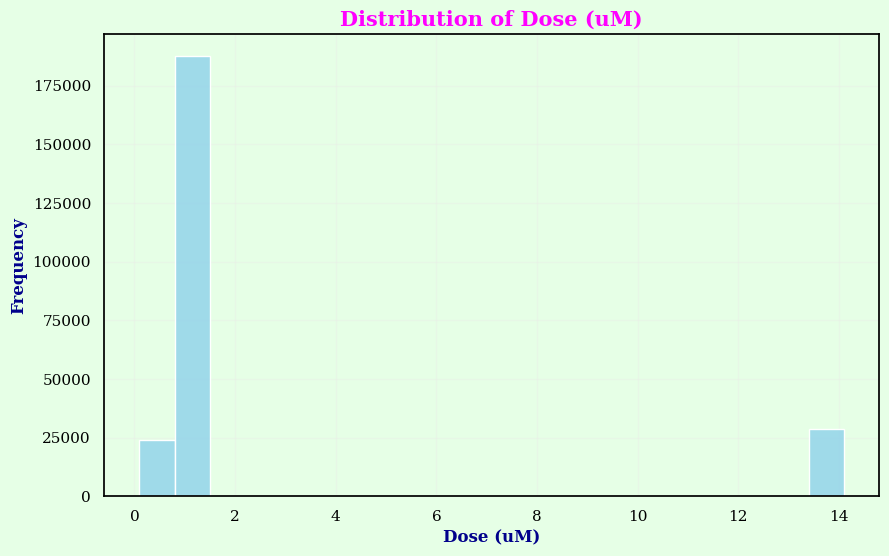

In [5]:
#sns.set_theme(style="whitegrid")

# Histogram for 'dose_uM'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='dose_uM', bins=20, color='skyblue')
plt.title("Distribution of Dose (uM)",fontsize = 15, fontweight = 'bold', color = 'magenta')
plt.xlabel("Dose (uM)",fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Frequency",fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Distribution of Dose (uM).png')
plt.show()

🟧 This plot shows the distribution of doses (in uM). It gives an idea of how the doses are spread across the dataset.


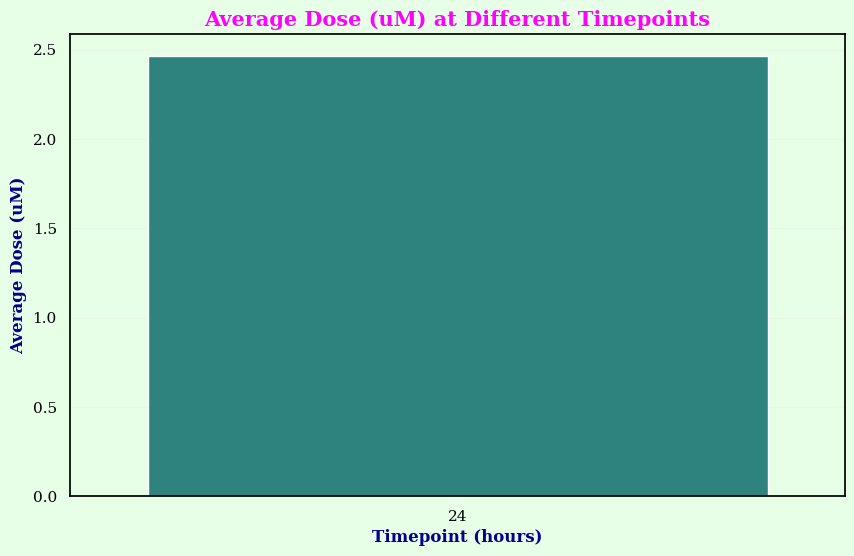

In [6]:
# Bar plot for 'timepoint_hr'
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='timepoint_hr', y='dose_uM', errorbar=None, palette='viridis')
plt.title("Average Dose (uM) at Different Timepoints",fontsize = 15, fontweight = 'bold', color = 'magenta')
plt.xlabel("Timepoint (hours)",fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Average Dose (uM)",fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Average Dose (uM) at Different Timepoints.png')
plt.show()

🟧 This plot displays the average dose (in uM) at different timepoints. It helps visualize how doses vary with time.

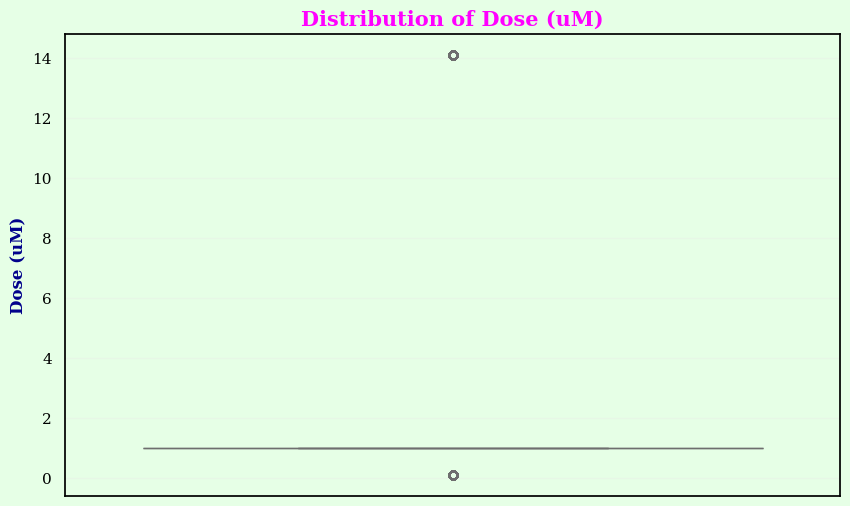

In [7]:
# Box plot for 'dose_uM'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='dose_uM', color='lightcoral')
plt.title("Distribution of Dose (uM)",fontsize = 15, fontweight = 'bold', color = 'magenta')
plt.ylabel("Dose (uM)",fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Distribution of Dose (uM).png')
plt.show()

🟧 The plot provides a summary of the distribution of doses, showing quartiles, median, and any potential outliers.


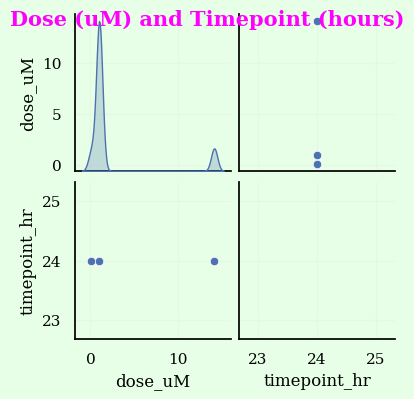

In [8]:
# Pair plot for 'dose_uM' and 'timepoint_hr'
sns.pairplot(df[['dose_uM', 'timepoint_hr']], height=2, diag_kind='kde', palette='plasma')
plt.suptitle("Dose (uM) and Timepoint (hours)",fontsize = 15, fontweight = 'bold', color = 'magenta')
plt.savefig('Dose (uM) and Timepoint (hours).png')
plt.show()

🟧 This plot displays the relationships and distributions of 'dose_uM' and 'timepoint_hr'. The diagonal shows kernel density estimates.


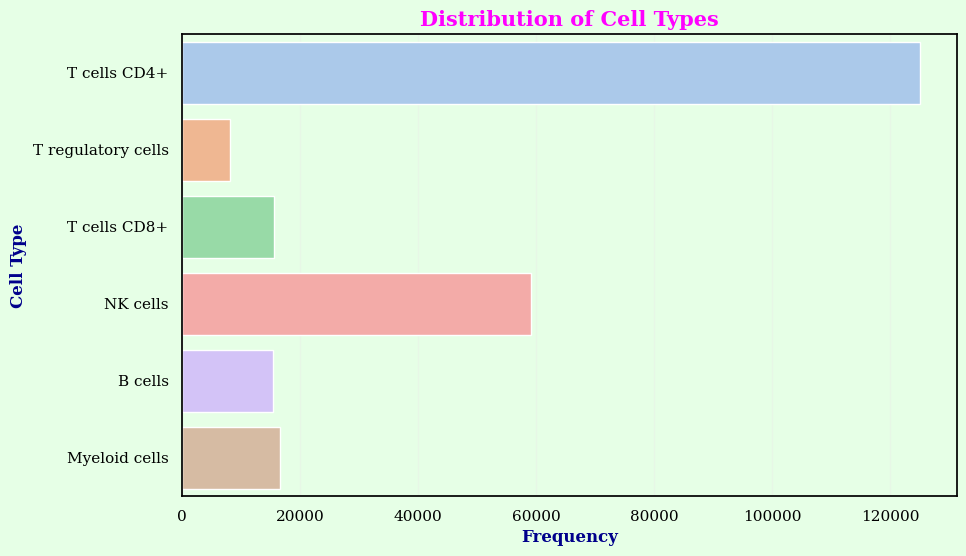

In [9]:
# Count plot for 'cell_type'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='cell_type', palette='pastel')
plt.title("Distribution of Cell Types",fontsize = 15, fontweight = 'bold', color = 'magenta')
plt.xlabel("Frequency",fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Cell Type",fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Distribution of Cell Types.png')
plt.show()


🟧 This plot counts the occurrences of each cell type, giving an overview of the distribution of cell types in the dataset.
Heatmap for correlations:

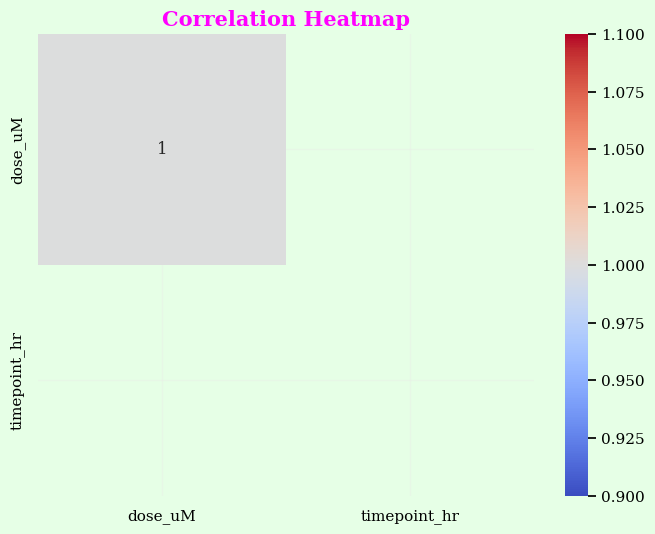

In [10]:
# Heatmap for correlations
correlation_matrix = df[['dose_uM', 'timepoint_hr']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap",fontsize = 15, fontweight = 'bold', color = 'magenta')
plt.savefig('Correlation Heatmap.png')
plt.show()

🟧 This heatmap visualizes the correlation between 'dose_uM' and 'timepoint_hr'. Values closer to 1 indicate a stronger positive correlation.


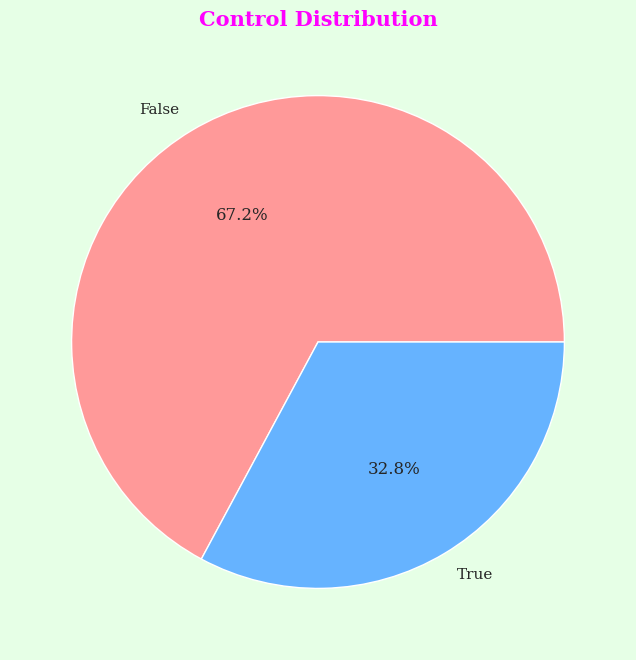

In [11]:
# Pie chart for 'control'
control_counts = df['control'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(control_counts, labels=control_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Control Distribution",fontsize = 15, fontweight = 'bold', color = 'magenta')
plt.savefig('Control Distribution.png')
plt.show()

🟧 The pie chart displays the distribution of 'control' values (True or False) as a percentage of the total.


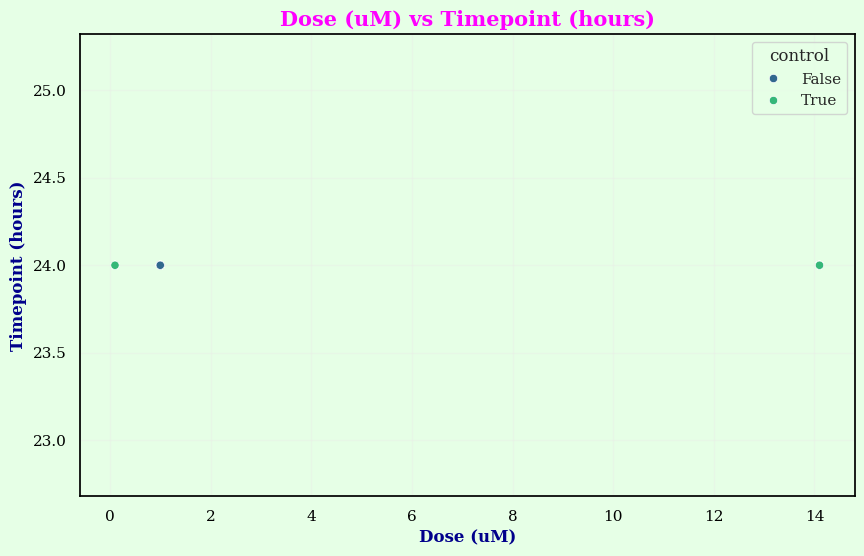

In [12]:
# Scatter plot for 'dose_uM' vs 'timepoint_hr'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dose_uM', y='timepoint_hr', hue='control', palette='viridis')
plt.title("Dose (uM) vs Timepoint (hours)",fontsize = 15, fontweight = 'bold', color = 'magenta')
plt.xlabel("Dose (uM)",fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Timepoint (hours)",fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Dose (uM) vs Timepoint (hours).png')
plt.show()


🟧 This scatter plot visualizes the relationship between 'dose_uM' and 'timepoint_hr'. Different colors represent different control values.


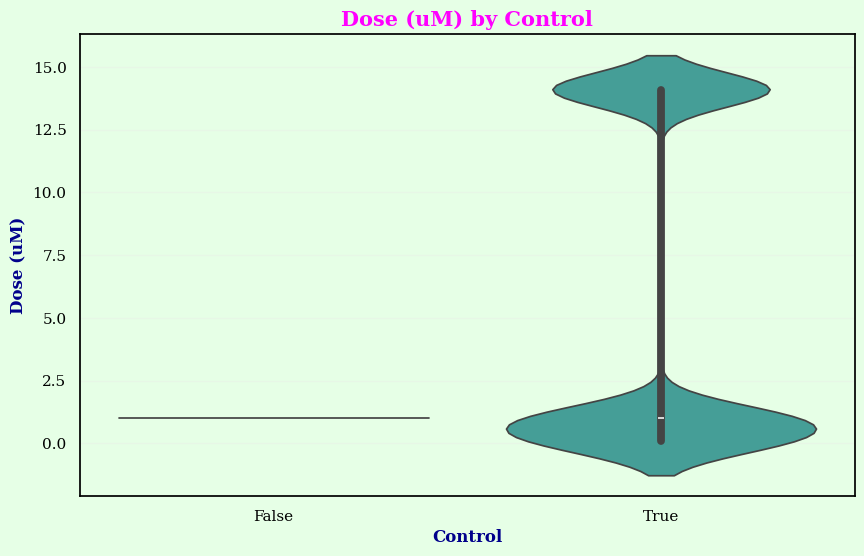

In [13]:
# Violin plot for 'dose_uM' by 'control'
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='control', y='dose_uM', palette='husl')
plt.title("Dose (uM) by Control",fontsize = 15, fontweight = 'bold', color = 'magenta')
plt.xlabel("Control",fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Dose (uM)",fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Dose (uM) by Control.png')
plt.show()


🟧 This plot shows the distribution of doses for each control category, allowing for a comparison of distributions.


# <div style="color:magenta;display:inline-block;border-radius:5px;background-color:#E6FFE6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:magenta;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>Feature Extraction</p></div>


🟦 Convert SMILES strings into a numerical representation suitable for T-SNE and PCA. For simplicity, we'll use Morgan fingerprints.

<h2 style="color: #4CAF50;">Morgan Fingerprints</h2>
<p style="color: darkblue; font-size: 16px;">Morgan fingerprints,also known as circular fingerprints or Extended Connectivity Fingerprints (ECFP), are a type of molecular representation used in chemoinformatics and computational chemistry. They encode information about the structural features of a molecule.</p>

<p style="color: darkblue; font-size: 16px;">Specifically, Morgan fingerprints are generated by considering the presence or absence of substructures (circular substructures or "ECFP" refers to Extended Connectivity of Functional Groups) within a certain radius around each atom in a molecule. The result is a fixed-length binary vector (bitstring) that encodes the presence or absence of specific substructures.</p>

<p style="color: darkblue; font-size: 16px;">These fingerprints are widely used in tasks such as similarity searching, compound clustering, and machine learning-based predictive modeling in the field of chemoinformatics. They are popular because they can be used to represent molecules in a format suitable for machine learning algorithms.</p>

<p style="color: darkblue; font-size: 16px;">The radius parameter in Morgan fingerprints determines how many bonds away from each atom the algorithm considers when generating the fingerprints. Larger radii capture more global structural information, but also result in longer fingerprint vectors.</p>

<p style="color: darkblue; font-size: 16px;">In summary, Morgan fingerprints are a way to represent the structural features of a molecule in a format suitable for computational analysis and machine learning applications in chemistry and drug discovery.</p>


<html>
<body>
    <span style="color: blue; font-weight: bold; font-size: 20px;">T-SNE Visualization:</span>
    <ol>
       <li style="color: purple; font-size: 18px;">Apply T-SNE to the features for dimensionality reduction and visualization.
</li>
    </ol>




In [15]:
# Importing necessary libraries
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

# Feature Extraction (Morgan Fingerprints)
def generate_morgan_fingerprint(smiles):
    """Generates Morgan fingerprint for a given SMILES string."""
    try:
        mol = Chem.MolFromSmiles(smiles)  # Convert SMILES to molecule
        if mol is not None:  # Check if molecule is valid
            return AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    except Exception as e:
        return None  # Return None if any error occurs

# Check DataFrame content and ensure 'SMILES' column exists
print(df.head())  # Debugging: check the first few rows of the DataFrame
print(df.columns)  # Debugging: ensure 'SMILES' column exists

# Apply the function to the 'SMILES' column to generate fingerprints
df['Morgan_Fingerprints'] = df['SMILES'].apply(generate_morgan_fingerprint)

# Remove rows with invalid SMILES (where fingerprint generation failed)
df = df[df['Morgan_Fingerprints'].notna()]

# Remove duplicate SMILES strings, keeping the first occurrence
df = df.drop_duplicates(subset='SMILES', keep='first')

# Final output: Display the first few rows after processing
print(f"Final DataFrame shape: {df.shape}")
print(df[['SMILES', 'Morgan_Fingerprints']].head())  # Check the final result

             obs_id  library_id plate_name well row  col cell_id donor_id  \
0  000006a87ba75b72   library_4    plate_4   F7   F    7    PBMC  donor_2   
1  0000233976e3cd37   library_0    plate_3   D4   D    4    PBMC  donor_1   
2  0001533c5e876362   library_2    plate_0  B11   B   11    PBMC  donor_0   
3  00022f989630d14b  library_35    plate_2   E6   E    6    PBMC  donor_0   
4  0002560bd38ce03e  library_22    plate_4   B6   B    6    PBMC  donor_2   

            cell_type sm_lincs_id      sm_name  \
0        T cells CD4+    LSM-4944     MLN 2238   
1        T cells CD4+   LSM-46203   BMS-265246   
2  T regulatory cells   LSM-45663  Resminostat   
3        T cells CD4+   LSM-43216       FK 866   
4        T cells CD4+    LSM-1099    Nilotinib   

                                              SMILES  dose_uM  timepoint_hr  \
0      CC(C)C[C@H](NC(=O)CNC(=O)c1cc(Cl)ccc1Cl)B(O)O      1.0            24   
1        CCCCOc1c(C(=O)c2c(F)cc(C)cc2F)cnc2[nH]ncc12      1.0            24   

In [ ]:
# Feature Extraction (Morgan Fingerprints)
#df['Morgan_Fingerprints'] = df['SMILES'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), 2, nBits=1024))


In [16]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Feature Extraction (Morgan Fingerprints)
def generate_morgan_fingerprint(smiles):
    """Generates Morgan fingerprint for a given SMILES string.

    Args:
        smiles (str): The SMILES string representing the molecule.

    Returns:
        rdkit.DataStructs.cDataStructs.ExplicitBitVect: The Morgan fingerprint
            as a bit vector. Returns None if the SMILES string is invalid.
    """
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:  # Check if mol is valid
            fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
            return fingerprint
        else:
            print(f"Invalid SMILES string: {smiles}")  # Print invalid SMILES for debugging
            return None
    except Exception as e:
        print(f"Error processing SMILES string {smiles}: {e}")  # Print error message for debugging
        return None

df['Morgan_Fingerprints'] = df['SMILES'].apply(generate_morgan_fingerprint)

# Optionally, remove rows with invalid SMILES strings
df = df.dropna(subset=['Morgan_Fingerprints'])

<html>
<body>
    <span style="color: blue; font-weight: bold; font-size: 20px;">PCA Visualization:</span>
    <ol>
       <li style="color: purple; font-size: 18px;">Apply PCA to the features for dimensionality reduction and visualization.
</li>
    </ol>

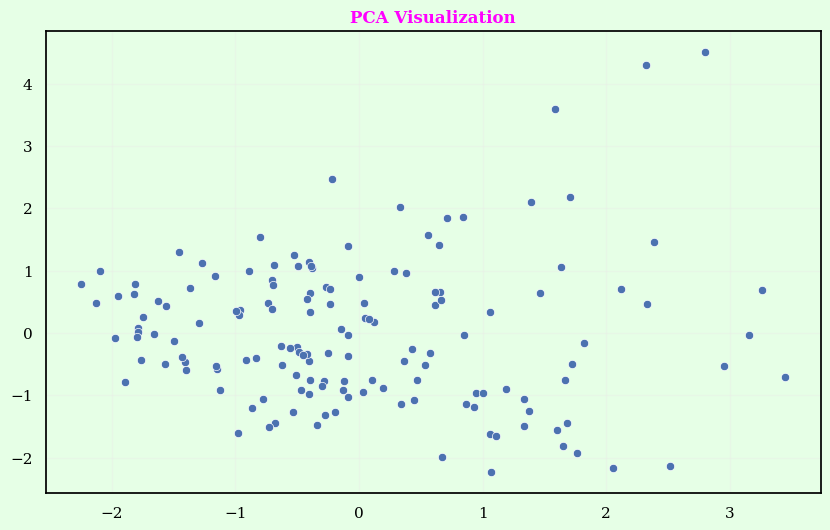

In [17]:
# PCA Visualization
pca = PCA(n_components=2, random_state=42)
features_pca = pca.fit_transform(list(df['Morgan_Fingerprints']))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1])
plt.title("PCA Visualization", fontweight = 'bold', color = 'magenta')
plt.savefig('PCA Visualization.png')
plt.show()


<html>
<body>
    <span style="color: blue; font-weight: bold; font-size: 20px;">Molecule Visualizations:</span>
    <ol>
       <li style="color: purple; font-size: 18px;">Generate images for a subset of molecules using RDKit.
</li>
    </ol>


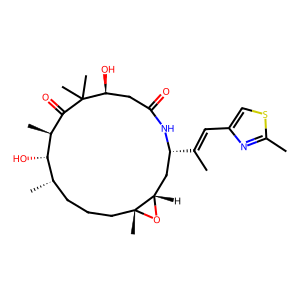

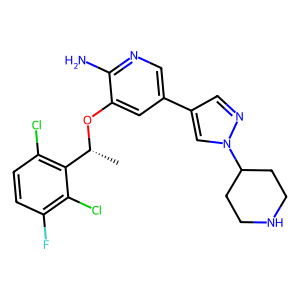

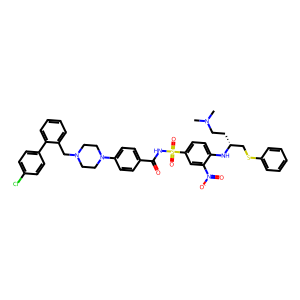

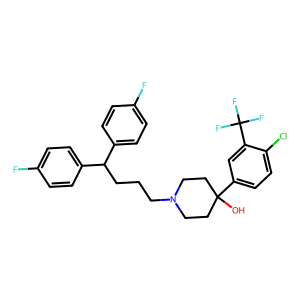

In [18]:
# Add a new column 'Molecule' with RDKit Mol objects
df['Molecule'] = df['SMILES'].apply(Chem.MolFromSmiles)

# Visualize a subset of molecules
sample_molecules = df['Molecule'].sample(4)  # Change 5 to the desired number of molecules to visualize

for mol in sample_molecules:
    img = Draw.MolToImage(mol)
    display(img)

In [19]:
df.head()

,obs_id,library_id,plate_name,well,row,col,cell_id,donor_id,cell_type,sm_lincs_id,sm_name,SMILES,dose_uM,timepoint_hr,control,Morgan_Fingerprints,Molecule
0,000006a87ba75b72,library_4,plate_4,F7,F,7,PBMC,donor_2,T cells CD4+,LSM-4944,MLN 2238,CC(C)C[C@H](NC(=O)CNC(=O)c1cc(Cl)ccc1Cl)B(O)O,1.0,24,False,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",<rdkit.Chem.rdchem.Mol object at 0x782d9ac04c10>
1,0000233976e3cd37,library_0,plate_3,D4,D,4,PBMC,donor_1,T cells CD4+,LSM-46203,BMS-265246,CCCCOc1c(C(=O)c2c(F)cc(C)cc2F)cnc2[nH]ncc12,1.0,24,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...",<rdkit.Chem.rdchem.Mol object at 0x782d9ac04ba0>
2,0001533c5e876362,library_2,plate_0,B11,B,11,PBMC,donor_0,T regulatory cells,LSM-45663,Resminostat,CN(C)Cc1ccc(S(=O)(=O)n2ccc(/C=C/C(=O)NO)c2)cc1,1.0,24,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",<rdkit.Chem.rdchem.Mol object at 0x782d9ac04e40>
3,00022f989630d14b,library_35,plate_2,E6,E,6,PBMC,donor_0,T cells CD4+,LSM-43216,FK 866,O=C(/C=C/c1cccnc1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,1.0,24,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",<rdkit.Chem.rdchem.Mol object at 0x782d9ac04c80>
4,0002560bd38ce03e,library_22,plate_4,B6,B,6,PBMC,donor_2,T cells CD4+,LSM-1099,Nilotinib,Cc1cn(-c2cc(NC(=O)c3ccc(C)c(Nc4nccc(-c5cccnc5)...,1.0,24,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",<rdkit.Chem.rdchem.Mol object at 0x782d9ac04d60>


In [20]:
from sklearn.model_selection import train_test_split

# Define the train set (T, NK cells + 10% of Myeloid and B cells)
train_set = df[df['cell_type'].isin(['T cells CD4+', 'T cells CD8+', 'Regulatory T cells', 'NK cells'])]
myeloid_b_cells = df[df['cell_type'].isin(['B cells naive', 'Myeloid dendritic cells resting'])]

# Check if myeloid_b_cells has any samples
if len(myeloid_b_cells) > 0:
    myeloid_b_cells_sampled = myeloid_b_cells.sample(frac=0.1, random_state=42)
    train_set = pd.concat([train_set, myeloid_b_cells_sampled])

    # Define the public test set (50 randomly selected compounds in B and myeloid cells)
    public_test_set = myeloid_b_cells.drop(myeloid_b_cells_sampled.index).sample(n=50, random_state=42)

    # Define the private test set (79 randomly selected compounds in B and myeloid cells)
    private_test_set = myeloid_b_cells.drop(myeloid_b_cells_sampled.index).drop(public_test_set.index)

    # Check shapes of the splits
    print(f"Train set shape: {train_set.shape}")
    print(f"Public test set shape: {public_test_set.shape}")
    print(f"Private test set shape: {private_test_set.shape}")
else:
    print("myeloid_b_cells has no samples.")


myeloid_b_cells has no samples.


In [25]:
import pandas as pd
df2 = pd.read_parquet('/de_train.parquet')
df2.tail()

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
609,T regulatory cells,Atorvastatin,LSM-5771,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,False,-0.014372,-0.122464,-0.456366,-0.147894,-0.545382,...,-0.549987,-2.200925,0.359806,1.073983,0.356939,-0.029603,-0.528817,0.105138,0.491015,-0.979951
610,NK cells,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,-0.455549,0.188181,0.595734,-0.100299,0.786192,...,-1.236905,0.003854,-0.197569,-0.175307,0.101391,1.028394,0.034144,-0.231642,1.023994,-0.064760
611,T cells CD4+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.338168,-0.109079,0.270182,-0.436586,-0.069476,...,0.077579,-1.101637,0.457201,0.535184,-0.198404,-0.005004,0.552810,-0.209077,0.389751,-0.337082
612,T cells CD8+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.101138,-0.409724,-0.606292,-0.071300,-0.001789,...,0.005951,-0.893093,-1.003029,-0.080367,-0.076604,0.024849,0.012862,-0.029684,0.005506,-1.733112
613,T regulatory cells,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,-0.757116,0.085910,-0.730025,-1.367801,-0.695944,...,0.232343,-2.247816,-0.346036,-0.919567,-1.131372,-0.120252,-0.064537,-0.603280,-0.098041,-0.750681


In [26]:
# Drop the 'SMILES' column
main_df = df2.drop(columns=["sm_lincs_id", "control"])

# <div style="color:magenta;display:inline-block;border-radius:5px;background-color:#E6FFE6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:magenta;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>Build Model and Prediction</p></div>


In [27]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
main_df['cell_type'] = le.fit_transform(main_df['cell_type'])
main_df['sm_name'] = le.fit_transform(main_df['sm_name'])
main_df['SMILES'] = le.fit_transform(main_df['SMILES'])

main_df

,cell_type,sm_name,SMILES,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,2,39,101,0.104720,-0.077524,-1.625596,-0.144545,0.143555,0.073229,-0.016823,...,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,3,39,101,0.915953,-0.884380,0.371834,-0.081677,-0.498266,0.203559,0.604656,...,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,4,39,101,-0.387721,-0.305378,0.567777,0.303895,-0.022653,-0.480681,0.467144,...,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,5,39,101,0.232893,0.129029,0.336897,0.486946,0.767661,0.718590,-0.162145,...,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,2,84,81,4.290652,-0.063864,-0.017443,-0.541154,0.570982,2.022829,0.600011,...,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,5,14,21,-0.014372,-0.122464,-0.456366,-0.147894,-0.545382,-0.544709,0.282458,...,-0.549987,-2.200925,0.359806,1.073983,0.356939,-0.029603,-0.528817,0.105138,0.491015,-0.979951
610,2,116,53,-0.455549,0.188181,0.595734,-0.100299,0.786192,0.090954,0.169523,...,-1.236905,0.003854,-0.197569,-0.175307,0.101391,1.028394,0.034144,-0.231642,1.023994,-0.064760
611,3,116,53,0.338168,-0.109079,0.270182,-0.436586,-0.069476,-0.061539,0.002818,...,0.077579,-1.101637,0.457201,0.535184,-0.198404,-0.005004,0.552810,-0.209077,0.389751,-0.337082
612,4,116,53,0.101138,-0.409724,-0.606292,-0.071300,-0.001789,-0.706087,-0.620919,...,0.005951,-0.893093,-1.003029,-0.080367,-0.076604,0.024849,0.012862,-0.029684,0.005506,-1.733112


In [28]:
targets = main_df.columns[2:]
targets

Index(['SMILES', 'A1BG', 'A1BG-AS1', 'A2M', 'A2M-AS1', 'A2MP1', 'A4GALT',
       'AAAS', 'AACS', 'AAGAB',
       ...
       'ZUP1', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11B',
       'ZYX', 'ZZEF1'],
      dtype='object', length=18212)

In [29]:
from sklearn.model_selection import train_test_split

X = main_df.drop(targets, axis=1)
y = main_df[targets]

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor()

from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
base_estimator = RandomForestRegressor(n_estimators=100)
random_forest_model = MultiOutputRegressor(base_estimator)

from sklearn.linear_model import ElasticNet
logistic_reg_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

from sklearn.svm import SVR
svm_model = MultiOutputRegressor(SVR())

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# get the model
def get_model(n_inputs, n_outputs):
  model = Sequential()
  model.add(Dense(64, input_dim=n_inputs, kernel_initializer='he_normal', activation='relu'))
  model.add(Dropout(0.1))  # Dropout for regularization
  model.add(Dense(32, activation='relu'))
  model.add(Dense(n_outputs, activation='linear'))  # 'linear' activation for regression

  # Use the Adam optimizer with a custom learning rate
  optimizer = Adam(learning_rate=0.01)  # Experiment with the learning rate

  model.compile(loss='mse', optimizer=optimizer)
  return model

nn_model = get_model(X.shape[1], y.shape[1])

In [34]:
# Train the Models

linear_reg_model.fit(X_train, y_train)
logistic_reg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)


# Make Predictions

linear_reg_predictions = linear_reg_model.predict(X_test)
logistic_reg_predictions = logistic_reg_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
nn_predictions = nn_model.predict(X_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 14.9077
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [35]:
!mkdir /content/models

In [36]:
import pickle

file = open('models/linear-reg-model.pkl', 'wb')
pickle.dump(linear_reg_model, file)

file = open('models/logistic-reg-model.pkl', 'wb')
pickle.dump(logistic_reg_model, file)

file = open('models/decision-tree-reg-model.pkl', 'wb')
pickle.dump(decision_tree_model, file)

file = open('models/svm-model.pkl', 'wb')
pickle.dump(svm_model, file)

file = open('models/knn-model.pkl', 'wb')
pickle.dump(knn_model, file)

file = open('models/neurl-network-model.pkl', 'wb')
pickle.dump(nn_model, file)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score

def calculate_results(model_name, y_true, y_pred):
    print(f'Results for {model_name}:-')

    if isinstance(y_pred[0], int):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        print(f'Accuracy = {accuracy}')
        print(f'Precision = {precision}')
        print(f'Recall = {recall}')
        print(f'F1 Score = {f1_score}')

    else:
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        print(f'Mean Absoulte Error = {mae}')
        print(f'Mean Squared Error = {mse}')
        print(f'R-Squared (R2) = {r2}')

model_names = ['Linear Regression', 'Logistic Regression', 'Decision Tree', 'SVM', 'KNN', 'Neural Networks']
predictions = [linear_reg_predictions, logistic_reg_predictions, decision_tree_predictions, svm_predictions, knn_predictions, nn_predictions]

for model_name, y_pred in zip(model_names, predictions):
    calculate_results(model_name, y_test, y_pred)
    print("\n"+"="*30+"\n")

Results for Linear Regression:-
Mean Absoulte Error = 0.8277293388263876
Mean Squared Error = 3.297607849798656
R-Squared (R2) = -0.04483156481808071


Results for Logistic Regression:-
Mean Absoulte Error = 0.8082006924487497
Mean Squared Error = 3.271018983582298
R-Squared (R2) = -0.031816197617850865


Results for Decision Tree:-
Mean Absoulte Error = 1.3301002324646178
Mean Squared Error = 10.97844286484435
R-Squared (R2) = -3.67699010769591


Results for SVM:-
Mean Absoulte Error = 0.681788398875615
Mean Squared Error = 3.2717673896076733
R-Squared (R2) = -0.012346329271705175


Results for KNN:-
Mean Absoulte Error = 0.8417628110278734
Mean Squared Error = 3.1802711888887134
R-Squared (R2) = -0.2032354007550659


Results for Neural Networks:-
Mean Absoulte Error = 0.6837993688538866
Mean Squared Error = 3.631513045298558
R-Squared (R2) = -0.02879064716398716




In [38]:
import plotly.graph_objects as go

model_names = ['Linear Regression', 'Logistic Regression', 'Decision Tree', 'SVM', 'KNN', 'Neural Networks']
mae_scores = [0.828, 0.806, 1.182, 0.684, 0.869, 0.679]
mse_scores = [3.196, 3.172, 8.047, 3.166, 3.395, 3.203]

fig = go.Figure()
fig.add_trace(go.Bar(x=model_names, y=mae_scores, name='Mean Absolute Error', marker_color='orange'))
fig.add_trace(go.Bar(x=model_names, y=mse_scores, name='Mean Sqaured Error', marker_color='red'))

fig.update_layout(barmode='group', title='Model Evaluation Metrcis', xaxis_title='Model Name', yaxis_title='Score')
fig.show()